Unzip data: tar -xvzf 17flowers.tgz


Creating a simple image search script

Download the Oxford-17 flowers image data set, available at this link:



https://www.robots.ox.ac.uk/~vgg/data/flowers/17/



Upload this .tgz file to worker02



Choose one image in your data that you want to be the 'target image'. Write a Python script or Notebook which does the following:

Use the cv2.compareHist() function to compare the 3D color histogram for your target image to each of the other images in the corpus one-by-one.
In particular, use chi-square distance method, like we used in class. Round this number to 2 decimal places.
Save the results from this comparison as a single .csv file, showing the distance between your target image and each of the other images. The .csv file should show the filename for every image in your data except the target and the distance metric between that image and your target. Call your columns: filename, distance.


General instructions

For this exercise, you can upload either a standalone script OR a Jupyter Notebook
Save your script as image_search.py OR image_search.ipynb
If you have external dependencies, you must include a requirements.txt
You can either upload the script here or push to GitHub and include a link - or both!
Your code should be clearly documented in a way that allows others to easily follow along
Similarly, remember to use descriptive variable names! A name like hist is more readable than h.
The filenames of the saved images should clearly relate to the original image


Purpose

This assignment is designed to test that you have a understanding of:

how to make extract features from images based on colour space;
how to compare images for similarity based on their colour histogram;
how to combine these skills to create an image 'search engine'



In [99]:
#Loading packages:

import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [100]:
image_path = os.path.join("..", "data", "img","assignment3","jpg") #Specifying a filepath for loading data.

In [101]:
images = [] #Creating an empty list called 'images'.
filenames = [] #Creating an empty list called 'filenames'.

for filename in Path(image_path).glob("*.jpg"): #Telling my script to load all .jpg files in my specified filepath one-by-one.
    images.append(cv2.imread(os.path.join(filename)))  #Read the images and append the to my list called 'images'.
    filenames.append(os.path.basename(os.path.normpath(filename))) #Append the filename to my list called 'filenames'.

In [102]:
target_image = images[0] #Specifying the first image in the 'images'-list as my target image.

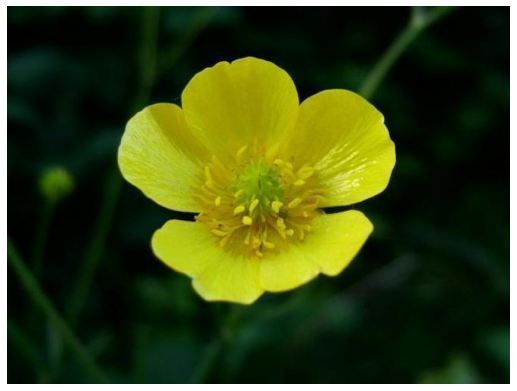

In [103]:
jimshow(target_image) #Printing my target image (as a sanity check).
images = images[1:] #Excluding my target image from the images-list.
filenames = filenames[1:] #Excluding my target image filename from the filenames-list.

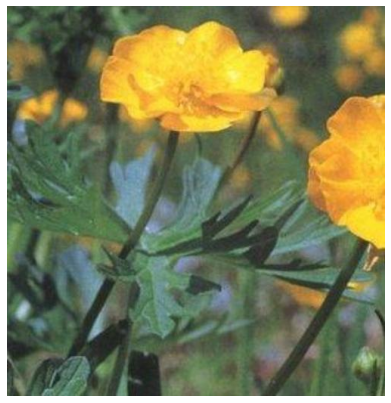

In [104]:
jimshow(images[0]) #Showing the first image in the images-list to ensure that my target-image has been removed (sanity check).

In [105]:
target_hist = cv2.calcHist([target_image], [0,1,2], None, [8,8,8], [0, 256,0, 256,0,256]) #Making my histogram for the target-image.

In [106]:
target_hist = cv2.normalize(target_hist, target_hist, 0,255, cv2.NORM_MINMAX) #Normalizing my target-histogram.

__Loop:__

In [118]:
CHISQR = [] #Define an empty list called 'CHISQR'.

for image in images: #For each image in the 'images'-list...
    hist = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256]) #... make a histogram called hist...
    hist = cv2.normalize(hist, hist, 0,255, cv2.NORM_MINMAX) #... normalize the histogram...
    CHISQR.append(round(cv2.compareHist(target_hist, hist, cv2.HISTCMP_CHISQR), 2)) #... calculate the distance between the image and the target-image and round it to two decimals. Then append it to the 'CHISQR'-list.

In [119]:
CHISQR[1:10] #Printing the first 10 variables in the 'CHISQR'-list (sanity check).

[5401209.0,
 18439447.21,
 15536717.3,
 15718641.94,
 110644619.6,
 16680750.5,
 96131.79,
 276216.23,
 7720079.55]

In [109]:
dict = {'filename': filenames, 'distance': CHISQR} #Creating column names and contents for a pandas-dataframe.

In [110]:
df = pd.DataFrame(dict) #Creating a pandas-dataframe using the above specifications.

In [111]:
df.to_csv('file1.csv') #Write the dataframe as a .csv-file called 'file1'.

In [112]:
#Testing:
df_test = pd.read_csv('file1.csv', index_col=0) #Loading the dataframe to ensure that it was writen correctly.

In [113]:
print(df_test) #Success.

            filename     distance
0     image_1172.jpg   5608677.02
1     image_0688.jpg   5401209.00
2     image_0957.jpg  18439447.21
3     image_0484.jpg  15536717.30
4     image_0024.jpg  15718641.94
...              ...          ...
1354  image_0453.jpg   6178562.70
1355  image_0605.jpg   1344019.63
1356  image_0674.jpg   6950177.02
1357  image_0375.jpg    425158.69
1358  image_0399.jpg  93679521.34

[1359 rows x 2 columns]
